<a href="https://colab.research.google.com/github/CodeTunisia/PysNum2022/blob/main/jour3/ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Résolution des équations différentielles ordinaires
Nous allons dans un premier temps nous intéresser aux équations différentielles que l'on peut mettre sous la forme :
$$\dot{x} = f(x(t), t)$$
où $f$ est une fonction définie sur une partie $U$ de $\mathbb{R}^2$ , à valeurs dans $\mathbb{R}$.

Une solution de cette équation différentielle est une fonction $x$ de classe $C^1$ définie sur un certain intervalle $I$ de $\mathbb{R}$ et à valeurs dans $\mathbb{R}$ vérifiant :

* (i) $\forall t \in I$ ; $(x(t), t) \in U$;

* (ii) $\forall t \in I$ ; $\dot{x} = f(x(t), t)$.

Nous allons adjoindre à cette équation différentielle une *condition initiale* sous la forme d'un couple $(x_0 , t_0 ) \in U$ et chercher à résoudre **le problème de Cauchy** suivant :

$$\left\{
    \begin{array}{ll}
    \dot{x} = f(x(t), t)\\
    x(t_0) = x_0
    \end{array}
\right.$$

Sous certaines conditions sur $f$ que nous ne détaillerons pas, ce problème admet une unique solution, que nous allons chercher à déterminer numériquement.

## Méthodes pour la résolution numérique des équations différentielles ordinaires
### Méthode d'Euler explicite (progressive)
Les méthodes que nous allons étudier consistent à subdiviser l'intervalle de temps $[t_0 , t_0 + T]$ en $n + 1$ points $t_0 < t_1 < \dots < t_n = t_0+ T$ puis à approcher la relation :
$$x(t_{k+1}) - x(t_k) = \int_{t_k}^{t_{k+1}} \dot{x} dt  = \int_{t_k}^{t_{k+1}} f(x(t), t) dt $$
La méthode *d'Euler explicite* consiste à approcher cette intégrale par la méthode du **rectangle gauche**, autrement dit à approcher $\int_{t_k}^{t_{k+1}} f(x(t), t) dt$ par $(t_{k+1} - t_k)f(x(t), t)$.


![](https://github.com/CodeTunisia/PysNum2022/blob/main/jour3/figures/fd_forward.png?raw=1)

En posant $h_k = t_{k+1} - t_k$ , ceci conduit à définir une suite de valeurs $x_0 , x_1,\dots, x_n$ à partir de la condition initiale
$x_0$ et de la *relation de récurrence* :
$$\forall k \in [0, n-1], \quad x_{k+1} = x_{k} + h_k f(x_k, t_k)$$

On observera qu'en général, seul le premier point $x_0$ de cette méthode est une valeur exacte ; les autres points sont calculés à partir de l'approximation précédente, ce qui peut conduire la valeur calculée $x_k$ à s'écarter de plus en plus de la valeur exacte $x(t_k)$.

### Méthode d'Euler implicite (rétrograde)
La méthode *d'Euler implicite* consiste à approcher l'intégrale $\int_{t_k}^{t_{k+1}} f(x(t), t) dt$ par la méthode du **rectangle droit**emph, ce qui conduit à définir la suite $(x_0 , x_1,\dots, x_n)$ par les relations :

$$\forall k \in [0, n-1], \quad x_{k+1} = x_{k} + h_k f(x_{k+1}, t_{k+1})$$

![](https://github.com/CodeTunisia/PysNum2022/blob/main/jour3/figures/fd_backward.png?raw=1)

On observe que cette relation *ne procure pas une relation explicite* de $x_{k+1}$ puisque ce terme est aussi présent dans le second membre. Pour calculer ce terme il est souvent nécessaire de coupler cette méthode à une méthode de résolution numérique des équations telle la méthode de Newton-Raphson. Pour cette raison, elle se révèle plus coûteuse à mettre en oeuvre.

Dans la pratique, la méthode d'Euler implicite se révèle souvent plus stable que la méthode explicite : elle est moins précise à court terme, mais diverge moins rapidement de la solution exacte que la méthode explicite.

### Méthode de Heun
$y_0 = y(a)$

Pour $k \in[0, n-1]$

$$v_k = y_k + h F(t_k, y_k)$$

La réccurrence pour $k \in[0, n-2]$

$$y_{k+1} = y_k + h \left( \dfrac{F(t_k, y_k)}{2} + \dfrac{F(t_{k+1}, v_k)}{2} \right)$$

Le terme $v_k$ représente la valeur approchée calculée par Euler. Ainsi, la méthode de Heun consiste à faire une moyenne entre la dérivée au temps $t_k$ et celle au temps $t_{k+1}$ en la valeur approchée calculée par Euler.

## Programmation en Python
On va implémenter ces méthodes et les tester avec $F(t,y) =-2.3 y$, par exemple sur $[0,10]$ avec $y_0= 1$. La solution exacte est alors $t \mapsto exp (-2.3 t)$.

Pour la méthode d'Euler implicite, on doit retrouver la relation de récurrence suivante :
$$y_{i+1} = \dfrac{1}{1 + 2.3h} y_i$$


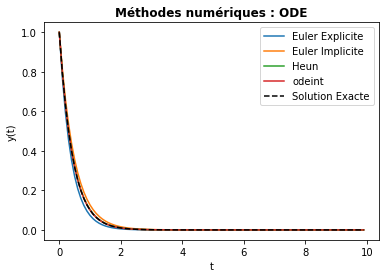

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def EulerExplicite(t0, tmax, y0, h, F):
    n = int((tmax-t0)/h)
    t = np.zeros(n)
    y = np.zeros(n)
    # conditions initiales
    t[0] = t0
    y[0] = y0
    # Algorithme Euler explicite
    for i in range(n-1):
        t[i+1] = t[i] + h
        y[i+1] = y[i] + h*F(y[i], t[i])
    return t, y
def EulerImplicite(t0, tmax, y0, h):
    n = int((tmax-t0)/h)
    t = np.zeros(n)
    y = np.zeros(n)
    # conditions initiales
    t[0] = t0
    y[0] = y0
    # Algorithme Euler Implicite
    for i in range(n-1):
        t[i+1] = t[i] + h
        y[i+1] = y[i]/(1+2.3*h)
    return t, y
def Heun(t0, tmax, y0, h, F):
    n = int((tmax-t0)/h)
    t = np.zeros(n)
    y = np.zeros(n)
    # conditions initiales
    t[0] = t0
    y[0] = y0
    # Algorithme Heun
    for i in range(n-1):
        t[i+1] = t[i] + h
        vi = y[i] + h*F(y[i], t[i])
        y[i+1] = y[i] + h*(F(y[i], t[i])/2 + F(vi, t[i+1])/2)
    return t, y

def F(y, t):
    return -2.3 * y
def Exacte(t):
    return np.exp(-2.3*t)
t0, tmax = 0, 10
y0 = 1
h = 0.1
t, yexp = EulerExplicite(t0, tmax, y0,h, F)
t, yimp = EulerImplicite(t0, tmax, y0,h)
t, yheu = Heun(t0, tmax, y0,h, F)
yode = odeint(F, y0, t)
plt.plot(t, yexp, label = "Euler Explicite")
plt.plot(t, yimp, label = "Euler Implicite")
plt.plot(t, yheu, label = "Heun")
plt.plot(t,yode, label = "odeint" )
plt.plot(t,Exacte(t),"--k", label = "Solution Exacte" )
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Méthodes numériques : ODE", weight = "bold")
plt.legend()
plt.show()


## Équation différentielles du second ordre
Une équation différentielle du second ordre s'écrit: 
$$\ddot{y} = F(y, \dot{y}, t)$$
Nous pouvons transformer l'équation différentielle scalaire du second degré en équation différentielle vectorielle du premier degré :

$\pmb{x}= \left(\begin{array}{c} y \\ \dot{y} \end{array}\right)$, $\pmb{\dot{x}} = G(t, \pmb{x})$

Les méthodes décrites précédemment (en dehors de la méthode Euler Implicite) s'appliquent parfaitement au cas vectoriel.

### Équation de mouvement : Oscillateur libre amortie

On considère un pendule simple qui va osciller d'arrière en avant à cause du champ de gravité de la Terre $g = 9.8 \ m/s^2$. 

![](https://github.com/CodeTunisia/PysNum2022/blob/main/jour3/figures/pendule.png?raw=1)


Le pendule a l'équation du mouvement :

\begin{align*}
\ddot{\theta} &= - sin(\theta) -0,4 \times \dot{\theta}
\end{align*}
Nous allons transformer l'équation différentielle d'ordre 2 en deux équations différentielles d'ordre 1 afin de pouvoir utiliser simplement les méthodes décrites précédemment. En posant $\omega(t)~=~\dot{\theta}(t)$ la vitesse angulaire du pendule, on obtient le système de deux fonctions inconnues suivant :
\begin{align*}
\dot{\theta} (t) &= \omega (t) \\
\dot{\omega }(t) &= - sin(\theta (t)) -0,4 \times \omega (t)
\end{align*}
d'où
$$\pmb{x}= \left(\begin{array}{c} \theta \\ \omega \end{array}\right), \ \pmb{\dot{x}} = G(t, \pmb{x}) = \left(\begin{array}{c} \omega \\ - sin(\theta) -0,4 \times \omega \end{array}\right)$$

Pour résoudre ce système nous devons connaître les deux conditions initiales suivantes :
\begin{align*}
\theta(t = 0) &= \theta_0 \\
\omega (t = 0) &= 0
\end{align*}

### Programmation en Python



(2, 200)


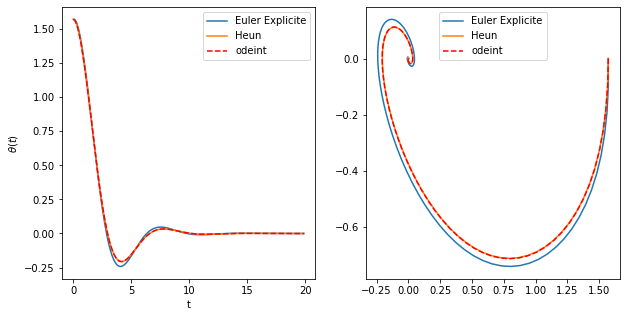

In [48]:
def EulerExplicite(t0, tmax, x0, h, G):
    n = int((tmax-t0)/h)
    t = np.zeros(n)
    x = np.zeros((2,n))
    # conditions initiales
    t[0] = t0
    x[:,0] = x0
    # Algorithme Euler explicite
    for i in range(n-1):
        t[i+1] = t[i] + h
        x[:,i+1] = x[:,i] + h*G(x[:,i], t[i])
    return t, x
def Heun(t0, tmax, x0, h, G):
    n = int((tmax-t0)/h)
    t = np.zeros(n)
    x = np.zeros((2, n))
    # conditions initiales
    t[0] = t0
    x[:,0] = x0
    # Algorithme Heun
    for i in range(n-1):
        t[i+1] = t[i] + h
        vi = x[:,i] + h*G(x[:,i], t[i])
        x[:,i+1] = x[:,i] + h*(G(x[:,i], t[i])/2 + G(vi, t[i+1])/2)
    return t, x
def G(x, t):
    theta, omega = x[0], x[1]
    return np.array([omega, -np.sin(theta)-1*omega])
t0, tmax = 0, 20
x0 = np.array([np.pi/2, 0])
h = 0.1
t, xexp = EulerExplicite(t0, tmax, x0, h, G)
t, xHeun = Heun(t0, tmax, x0, h, G)
xode = odeint(G, x0, t)
xode = xode.T
print(xode.shape)
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, xexp[0,:], label = "Euler Explicite")
plt.plot(t, xHeun[0, :], label = "Heun")
plt.plot(t, xode[0, :],"r--", label = "odeint")
plt.legend()
plt.ylabel(r"$\theta (t)$")
plt.xlabel("t")
plt.subplot(1, 2, 2)
plt.plot(xexp[0,:], xexp[1,:], label = "Euler Explicite")
plt.plot(xHeun[0, :], xHeun[1, :], label = "Heun")
plt.plot(xode[0, :], xode[1, :],"r--", label = "odeint")
plt.legend()
plt.show()
